# Matriz de rigidez de una viga-columna

_Análisis de Estructuras. Grado en Ingeniería Civil_

Autor:

- Alejandro E. Martínez-Castro.
- Departamento de Mecánica de Estructuras e Ingeniería Hidráulica. Universidad de Granada.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Matriz de rigidez de viga-columna</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Alejandro Martínez Castro</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Reconocimiento-NoComercial-CompartirIgual 4.0 Internacional License</a>.

## Objetivos del cuaderno

En este cuaderno se va a obtener la matriz de rigidez de una viga-columna a compresión. En la asignatura se codifica esta matriz en términos de cuatro funciones, denominadas _funciones de estabilidad_. En este cuaderno se demuestran dichas expresiones, con ayuda de la agilidad de cálculo de un asistente simbólico como Sympy.

En este cuaderno se hace referencia al siguiente libro: 

 _A. Martínez-Castro, E. Puertas, R. Gallego. "Inestabilidad de estructuras. Inestabilidad de barras comprimidas y pandeo global de estructuras". Ed. Godel._

Los objetivos son: 

- Generación de las funciones de desplazamiento equivalentes a los polinomios de Hermite en flexión de vigas, pero incluyendo el comportamiento viga-columna a compresión. Estas funciones están generadas por una base trigonométrica. 
- Introducción de la metodología general para obtener las denominadas "funciones de forma", que más adelante se emplearán en el Método de los Elementos Finitos. 
- Determinación de los términos de las columnas de la matriz de rigidez mediante la evaluación directa de los esfuerzos cortante y flector en los extremos (teniendo en cuenta las expresiones para viga-columna), y sus relaciones con las fuerzas y momentos en los extremos de barra.

En primer lugar, cargaremos el paquete SymPy, para poder realizar cálculos simbólicos

In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 1.9 (Python 3.8.12-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



## Definición de matrices de base trigonométricas y su primera derivada

Las soluciones para viga-columna sometida a carga de compresión $P$ están generadas por la base de funciones

$$\left[ 1,x,\cos \left(\dfrac{\mu}{L} x \right), \sin \left(\dfrac{\mu}{L} x \right) \right]$$

siendo $\mu = L \, \sqrt{\dfrac{P}{EI}}$, $P$ el esfuerzo axil de compresión, y $EI$ la rigidez de la viga (producto del módulo de elasticidad $E$ por el momento de inercia de la sección transversal $I$).

Definiremos a continuación los símbolos $L$ y $\mu$, y definiremos la base de funciones sobre la que se construirán las soluciones.

In [2]:
mu, L = symbols('\mu L')
base = Matrix([[1,x,cos(mu/L*x),sin(mu/L*x)]])
base

Nótese que, a diferencia de las soluciones para vigas de Bernoulli-Euler, en esta ocasión el espacio de soluciones depende no sólo de $x$, que permitirá posicionar cada abscisa, sino también de $\mu$, que definirá una forma diferente (sinusoidal) para cada carga $P$. Para valores crecientes de $P$, la forma presentará mayor número de pasos por 0 para el mismo intervalo de referencia. 

Definamos además una lista con la derivada primera de estas funciones de base, pues necesitaremos imponer condiciones en giros:

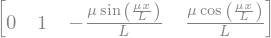

In [3]:
deribase = diff(base,x)
deribase

## Construcción de la matriz de aplicaciones lineales asociadas a evaluar en los extremos del elemento viga-columna comprimida.

A continuación, construiremos la matriz asociada a cuatro aplicaciones lineales (por filas). En cada fila, se construirán las siguientes matrices: 
- En la primera fila, la aplicación para evaluar en el origen, $x=0$.
- En la segunda fila, la aplicación para evaluar la primera derivada en el origen $x=0$. 
- En la tercera fila, la aplicación para evaluar la función en $x=L$. 
- En la cuarta fila, la aplicación para evaluar la derivada de la función en $x=L$. 

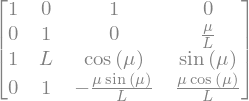

In [4]:
matM = Matrix.vstack(base.subs(x,0),
                     deribase.subs(x,0),
                       base.subs(x, L),
                     deribase.subs(x,L))
matM

La inversa de esta matriz, por columnas, contiene los cuatro coeficientes que multiplicarán a la base para construir las cuatro funciones $N1(x), N2(x), N3(x), N4(x)$. 

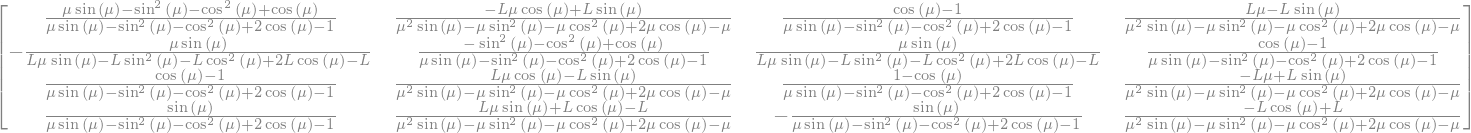

In [5]:
Inv_matM = matM.inv()
Inv_matM

En este caso, las expresiones son "farragosas". Vamos a simplificarlas. 

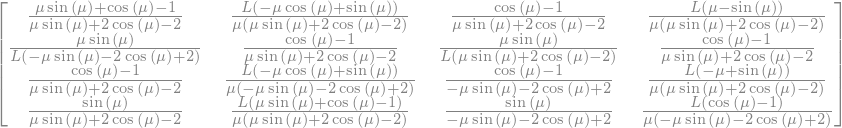

In [6]:
Inv_matM = simplify(Inv_matM)
Inv_matM

## Construcción de las funciones de forma

In [7]:
N1 = base.dot(Inv_matM.col(0))
N2 = base.dot(Inv_matM.col(1))
N3 = base.dot(Inv_matM.col(2))
N4 = base.dot(Inv_matM.col(3))

Veamos alguna de ellas

In [ ]:
N1

## Definición de las funciones "esfuerzo cortante" y "momento flector" en la viga-columna comprimida

A continuación se definen las funciones que permiten obtener el esfuerzo cortante $\mathcal{V}(x)$ y el momento flector $\mathcal{M}(x)$, para una viga-columna comprimida. Estas funciones pueden construirse a partir de la solución para el desplazamiento $y(x)$, como: 

\begin{eqnarray}
\mathcal{V}(x) & = & - EI\,y'''(x) - P \,y'\\
\mathcal{M}(x) & = & EI\,y''(x)
\end{eqnarray}

Siendo $P$ el esfuerzo axil de compresión. 

Nótese que se está empleando $\mu$ en lugar de $P$ en las expresiones. Su relación es: 

$$P = EI\,\dfrac{\mu^2}{L^2}$$

Nótese que estas funciones tienen signo, coherente con lo visto en la asignatura.

In [8]:
EI = symbols('EI')
def cortante(f):
    return -EI*diff(f,x,3) - EI*mu**2/L**2 * diff(f,x) # Corrección para el cortante en una viga-columna

def flector(f):
    return EI*diff(f,x,2)

## Construcción de la matriz de rigidez. 

La columna $j$ de la matriz de rigidez, con $j\in[1,4]$ tiene 4 términos. En los cuatro términos de las filas, se ubican las fuerzas y momentos, según el criterio de signos para fuerzas en extremos de barras (no confundir con los signos para los momentos), que deben aplicarse para que la función de desplazamiento sea $hj(x)$. 

Sus relaciones con las fuerzas y momentos en los extremos de barra, $P_{iy}, M_i, P_{jy}, M_j$, son las siguientes:

<img src="criteriosignosvigacol.png" width="500" >

\begin{eqnarray}
P_{iy} & = & - \mathcal{V}(0) \\
M_i & = & - \mathcal{M}{0} \\
P_{jy} & = & \mathcal{V}(L) \\
M_j & = & \mathcal{M}(L)
\end{eqnarray}

Considerando estas relaciones, podemos construir la matriz de rigidez, evaluando en los extremos según la relación anterior, y teniendo en cuenta las soluciones ya calculadas para las funciones $N1(x), N2(x), N3(x), N4(x)$. 

Definamos una función que nos devolverá la columna correspondiente a la matriz de rigidez, dada una función de desplazamiento genérica:

In [9]:
def columna(f):
    return Matrix([[-cortante(f).subs(x,0)],[-flector(f).subs(x,0)],[cortante(f).subs(x,L)],[flector(f).subs(x,L)]])

Construimos la matriz de rigidez, apilando las cuatro columnas.

In [10]:
matriz_rigidez = Matrix.hstack(columna(N1),columna(N2),columna(N3),columna(N4))
                     

In [11]:
matriz_rigidez = simplify(matriz_rigidez)

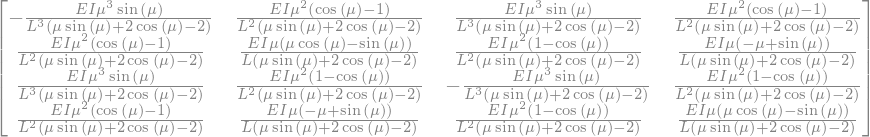

In [12]:
matriz_rigidez

## Comparación con solución aportada

A continuación, vamos a comprobar si esta matriz se corresponde con la matriz que se propone en el libro de la asignatura. Para esto, definamos en primer lugar los símbolos para las cuatro funciones de estabilidad, y generemos la matriz simbólica. 

In [13]:
fi1,fi2,fi3,fi4 = symbols('\phi_1 \phi_2 \phi_3 \phi_4')

In [14]:
matriz_rigidez_propuesta = Matrix( [ [fi4*EI/L**3,fi1*EI/L**2,-fi4*EI/L**3,fi1*EI/L**2],
                               [fi1*EI/L**2,fi2*EI/L,-fi1*EI/L**2,fi3*EI/L],
                               [-fi4*EI/L**3,-fi1*EI/L**2,fi4*EI/L**3,-fi1*EI/L**2,],
                               [fi1*EI/L**2,fi3*EI/L,-fi1*EI/L**2,fi2*EI/L]])

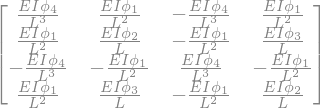

In [15]:
matriz_rigidez_propuesta

Puede comprobarse, término a término, que esta matriz se corresponde con la facilitada en el libro de la asignatura. 

Vamos a continuación a reemplazar las funciones de estabilidad por sus expresiones, propuestas en el libro:

In [16]:
deltac = 2*(1-cos(mu))-mu*sin(mu)
fi1 = mu**2 * (1 - cos(mu)) / deltac
fi2 = ( mu * sin(mu) - mu**2*cos(mu) )/deltac
fi3 = (mu**2 - mu * sin(mu))/deltac
fi4 = mu**3 * sin(mu) / deltac

mrigidez_propuesta = Matrix( [ [fi4*EI/L**3,fi1*EI/L**2,-fi4*EI/L**3,fi1*EI/L**2],
                               [fi1*EI/L**2,fi2*EI/L,-fi1*EI/L**2,fi3*EI/L],
                               [-fi4*EI/L**3,-fi1*EI/L**2,fi4*EI/L**3,-fi1*EI/L**2,],
                               [fi1*EI/L**2,fi3*EI/L,-fi1*EI/L**2,fi2*EI/L]])

Finalmente, compararemos ambas matrices. Una buena forma para hacerlo consiste en restar sus expresiones, y operando en modo simbólico. 

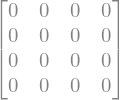

In [17]:
simplify(matriz_rigidez - mrigidez_propuesta)

En efecto, observamos que la diferencia es cero para todos los términos. Esto indica la matriz proporcionada en el libro de inestabilidad es correcta. 

# Ejercicio propuesto: 

Copie este cuaderno y modifíquelo para comprobar las expresiones de las matrices de rigidez para viga-columna sometida a un axil de tracción $T$. Recuerde que en esta ocasión, la base ya no incluye términos trigonométricos, sino trigonométricos hiperbólicos. 

## Expansión en serie de la matriz de rigidez

La expansión en serie, en función de $\mu$, de esta matriz de rigidez permite linealizar dicha matriz. En Sympy es sencillo obtener expansiones en serie. 

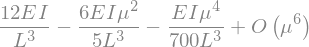

In [18]:
series(matriz_rigidez[(0,0)],mu)

In [ ]:
series(matriz_rigidez[(0,1)],mu)